In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
import kagglehub
import os
import shutil

download_path = kagglehub.dataset_download("nikolasgegenava/cat-breeds")

flat_dir = "data/cat-breeds"

if not os.path.exists(flat_dir):
    os.makedirs(flat_dir, exist_ok=True)
    nested_root = os.path.join(download_path, "cat-breeds")
    if os.path.exists(nested_root):
        for breed_folder in os.listdir(nested_root):
            src = os.path.join(nested_root, breed_folder)
            dst = os.path.join(flat_dir, breed_folder)
            if os.path.isdir(src):
                shutil.copytree(src, dst)
    else:
        print("Expected nested folder 'cat-breeds' not found.")
else:
    print("Already flattened at:", flat_dir)

print("Final dataset ready at:", flat_dir)


Final dataset ready at: data/cat-breeds


In [3]:
from pathlib import Path
data_path = Path("data/cat-breeds")
breeds_path = data_path / "cat-breeds"
train_path = data_path / "train"
test_path = data_path / "test"
train_path_mini = data_path / "train_mini"
test_path_mini = data_path / "test_mini"

if train_path_mini.is_dir():
    print(f"{train_path_mini} directory exists.")
else:
    print(f"Did not find {train_path_mini} directory, creating one...")
    train_path_mini.mkdir(parents=True, exist_ok=True)

if test_path_mini.is_dir():
    print(f"{test_path_mini} directory exists.")
else:
    print(f"Did not find {test_path_mini} directory, creating one...")
    test_path_mini.mkdir

if train_path.is_dir():
    print(f"{train_path} directory exists.")
else:
    print(f"Did not find {train_path} directory, creating one...")
    train_path.mkdir(parents=True, exist_ok=True)

if test_path.is_dir():
    print(f"{test_path} directory exists.")
else:
    print(f"Did not find {test_path} directory, creating one...")
    test_path.mkdir(parents=True, exist_ok=True)

Did not find data/cat-breeds/train_mini directory, creating one...
Did not find data/cat-breeds/test_mini directory, creating one...
Did not find data/cat-breeds/train directory, creating one...
Did not find data/cat-breeds/test directory, creating one...


In [4]:
from sklearn.model_selection import train_test_split

for breed_folder in breeds_path.iterdir():
  if(breed_folder.is_dir()):
    breed_name = breed_folder.name
    images = list(breed_folder.glob("*.png")) + list(breed_folder.glob("*.jpg"))

    if not images:
      continue  # skip this breed if it has no images
    train_images, test_images = train_test_split(images, test_size=0.2)
    (train_path / breed_name).mkdir(parents=True, exist_ok=True)
    (test_path / breed_name).mkdir(parents=True, exist_ok=True)

    if breed_name in ["maine_coon", "ragdoll", "manx"]:
      (train_path_mini / breed_name).mkdir(parents=True, exist_ok=True)
      (test_path_mini / breed_name).mkdir(parents=True, exist_ok=True)

      for image in train_images:
        shutil.copy(image, train_path_mini / breed_name)

      for image in test_images:
        shutil.copy(image, test_path_mini / breed_name)

    for image in train_images:
      shutil.copy(image, train_path / breed_name)

    for image in test_images:
      shutil.copy(image, test_path / breed_name)

    #print(f"Split {breed_name} into {len(train_images)} training images and {len(test_images)} test images. ({len(images)})")

print("Dataset split into train and test sets.")

Dataset split into train and test sets.


In [5]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [6]:
#walk_through_dir(data_path)

In [7]:
train_path, test_path, train_path_mini, test_path_mini

(PosixPath('data/cat-breeds/train'),
 PosixPath('data/cat-breeds/test'),
 PosixPath('data/cat-breeds/train_mini'),
 PosixPath('data/cat-breeds/test_mini'))

Random image path: data/cat-breeds/cat-breeds/devon_rex/0084.jpg
The class of the image is: devon_rex
The shape of the image is: (140, 140)


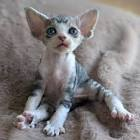

In [8]:
import random
from PIL import Image
import time



image_path_list = list(breeds_path.glob("*/*.png")) + list(breeds_path.glob("*/*.jpg"))

#while True:


random_image_path = random.choice(image_path_list)
#len(image_path_list)
#random_image_path
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"The class of the image is: {image_class}")
print(f"The shape of the image is: {img.size}")
  #time.sleep(5)
img


(np.float64(-0.5), np.float64(139.5), np.float64(139.5), np.float64(-0.5))

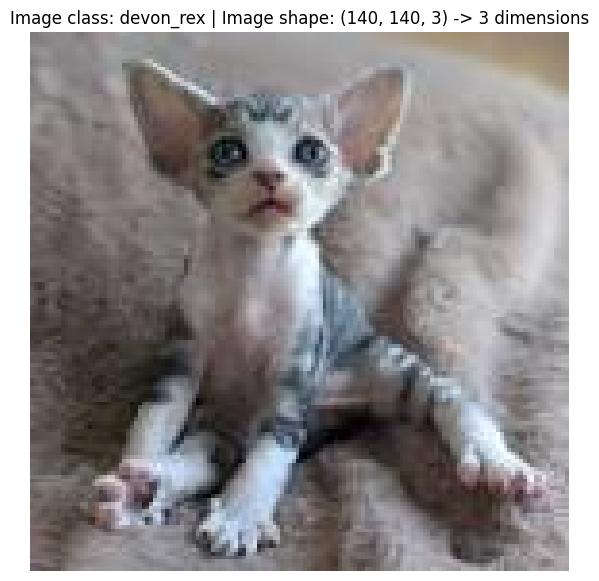

In [9]:
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> {img_as_array.ndim} dimensions")
plt.axis(False)

In [10]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

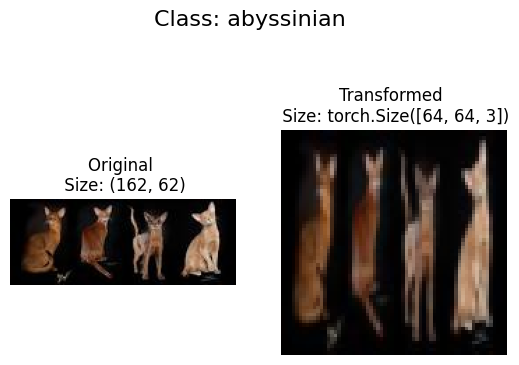

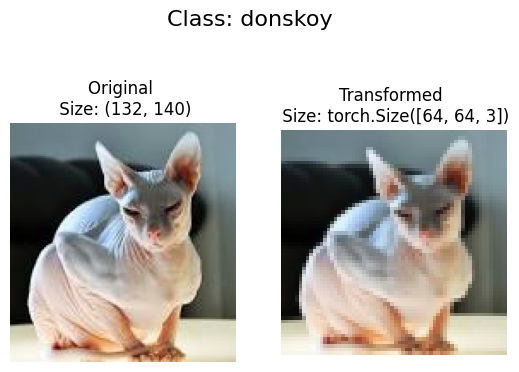

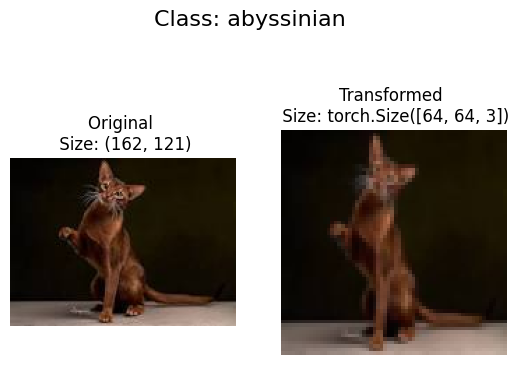

In [11]:
def plot_transformed_images(image_paths, transform, n=3):
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis("off")

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, simple_transform)

In [12]:
from torchvision import datasets
train_data = datasets.ImageFolder(train_path, transform=simple_transform)
test_data = datasets.ImageFolder(test_path, transform=simple_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 9006
     Root location: data/cat-breeds/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2278
     Root location: data/cat-breeds/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [13]:
class_names = train_data.classes

class_dict = train_data.class_to_idx

In [14]:
len(train_data), len(test_data)

(9006, 2278)

In [15]:
##Check the first data
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0902, 0.0902, 0.0902,  ..., 0.1137, 0.1137, 0.1059],
         [0.0902, 0.0902, 0.0902,  ..., 0.1098, 0.1176, 0.1137],
         [0.0902, 0.0902, 0.0902,  ..., 0.1020, 0.1176, 0.1216],
         ...,
         [0.2784, 0.2980, 0.3255,  ..., 0.2275, 0.2706, 0.2510],
         [0.2863, 0.3098, 0.3412,  ..., 0.1569, 0.1647, 0.1176],
         [0.2863, 0.3098, 0.3412,  ..., 0.1098, 0.1098, 0.0627]],

        [[0.0902, 0.0902, 0.0902,  ..., 0.0627, 0.0627, 0.0588],
         [0.0902, 0.0902, 0.0902,  ..., 0.0627, 0.0667, 0.0627],
         [0.0902, 0.0902, 0.0902,  ..., 0.0588, 0.0667, 0.0706],
         ...,
         [0.2000, 0.2196, 0.2431,  ..., 0.1804, 0.2196, 0.2118],
         [0.2118, 0.2314, 0.2588,  ..., 0.1137, 0.1137, 0.0784],
         [0.2118, 0.2353, 0.2627,  ..., 0.0667, 0.0627, 0.0275]],

        [[0.0902, 0.0902, 0.0902,  ..., 0.0392, 0.0392, 0.0275],
         [0.0902, 0.0902, 0.0902,  ..., 0.0392, 0.0431, 0.0353],
         [0.0902, 0.0902, 0.0902,  ..., 0.03

In [16]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, BATCH_SIZE, shuffle=False)

In [17]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


In [18]:
class Model0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels= input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x



In [19]:
model_0 = Model0(input_shape = 3, hidden_units=10, output_shape = len(class_names)).to(device)
model_0

Model0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=66, bias=True)
  )
)

In [20]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0038, -0.0225, -0.0376, -0.0569,  0.0381,  0.0534, -0.0054, -0.0212,
         -0.0537,  0.0120,  0.1116, -0.0224,  0.0057,  0.0340, -0.0037,  0.0404,
         -0.0149, -0.0329, -0.0087,  0.0465, -0.0695,  0.0392, -0.0428,  0.0006,
         -0.0237,  0.0316, -0.0882,  0.0110,  0.0423,  0.0888,  0.0366, -0.0291,
         -0.0022,  0.0192, -0.0559, -0.0584,  0.0078,  0.0848,  0.1307,  0.0310,
         -0.0647,  0.1253, -0.0605, -0.0620, -0.0018, -0.0009, -0.0523, -0.0804,
          0.0213,  0.0714,  0.0013,  0.0229, -0.0177,  0.0452,  0.0628,  0.0576,
         -0.0430,  0.0252, -0.0080, -0.0059, -0.0101, -0.0055, -0.0348, -0.0112,
         -0.0844, -0.0029]], device='cuda:0')

Output prediction probabilities:
tensor([[0.0152, 0.0148, 0.0146, 0.0143, 0.0157, 0.0159, 0.0150, 0.0148, 0.0143,
         0.0153, 0.0169, 0.0148, 0.0152, 0.0156, 0.0151, 0.0157, 0.0149, 0.0146,
         0.0150, 0.0158, 0.0141, 0.0157, 0.0145

In [21]:
def train_setp(model, dataloader,loss_fn, optimizer, device = device):
  model.train()

  train_loss, train_acc = 0,0

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1),dim = 1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)*100

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [22]:
def test_step(model, dataloader, loss_fn, device = device):
  model.eval()
  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for (X,y) in dataloader:
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss

      test_pred_class = torch.argmax(torch.softmax(test_pred, dim = 1), dim = 1)
      test_acc += (test_pred_class == y).sum().item()/len(test_pred)*100

  test_loss = test_loss.clone()
  test_acc /= len(dataloader)
  test_loss /= len(dataloader)

  return test_loss, test_acc

In [23]:
from tqdm.auto import tqdm

def train(model,train_dataloader, test_dataloader, loss_fn, optimizer, epochs, device = device):
  results = {"train_loss" : [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_setp(model, train_dataloader, loss_fn, optimizer, device)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, device)

    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

  return results

In [24]:
EPOCHS = 5

model_0 = Model0(input_shape = 3, hidden_units=10, output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.001)

from timeit import default_timer as timer

start = timer()
model_0_results = None
#model_0_results = train(model = model_0,       train_dataloader = train_dataloader,           test_dataloader = test_dataloader,         loss_fn = loss_fn,        optimizer = optimizer,      epochs = EPOCHS,   device = device)

end = timer()
print(f"Total training time: {end-start:.3f} seconds")

Total training time: 0.000 seconds


In [25]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [26]:
if model_0_results:
  plot_loss_curves(model_0_results)

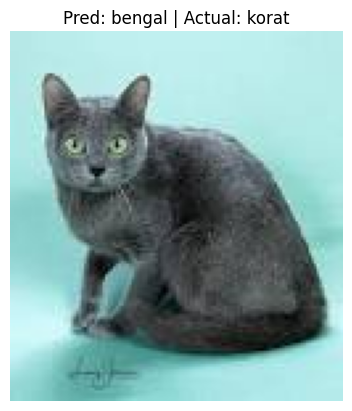

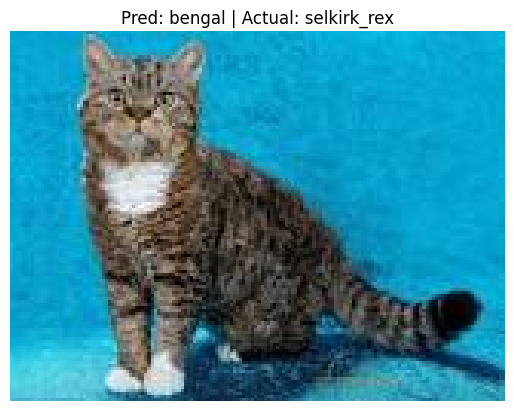

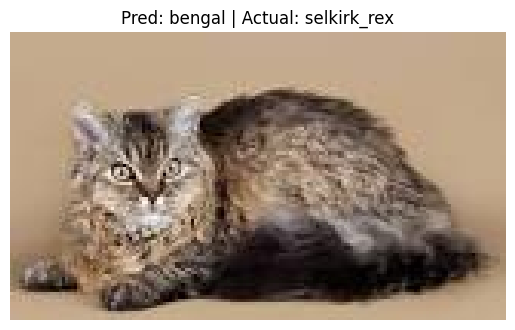

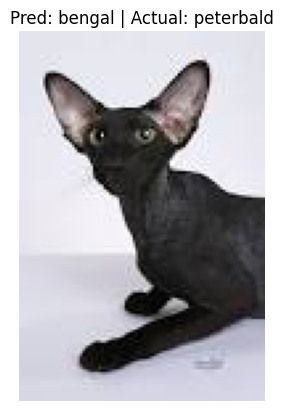

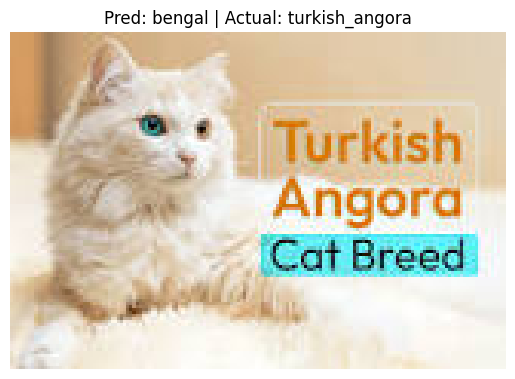

In [27]:
# prompt: make a functions to make predictions. Show an image with randomly selected, like 5 make it a hyperparam, show the prediction label and the actual label

def pred_and_plot_images(model, image_paths, class_names, transform, n=5):
  """Makes predictions on a random sample of images and plots them with their predictions.

  Args:
    model (torch.nn.Module): PyTorch model to make predictions with.
    image_paths (list): List of image paths to choose from.
    class_names (list): List of class names for the dataset.
    transform (torchvision.transforms): Transform to apply to the images.
    n (int): Number of random images to predict on and plot. Defaults to 5.
  """
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as img:

      # 1. Get prediction class
      # Turn image into a tensor
      transformed_image = transform(img).unsqueeze(0).to(device) # Add batch dimension and send to device

      # Pass the image through our model
      model.eval()
      with torch.inference_mode():
          pred_logit = model(transformed_image) # Pass the image through the model (multiplies by weights)
          pred_prob = torch.softmax(pred_logit, dim=1) # Turn logits into prediction probabilities
          pred_label = torch.argmax(pred_prob, dim=1) # Turn prediction probabilities into prediction labels
          pred_class = class_names[pred_label.cpu()] # Put prediction on CPU and get the class name

      # 2. Plot the image with prediction text
      plt.figure()
      plt.imshow(np.asarray(img))
      plt.title(f"Pred: {pred_class} | Actual: {image_path.parent.stem}")
      plt.axis(False);

pred_and_plot_images(model=model_0,
                     image_paths=list(test_path.glob("*/*.png")) + list(test_path.glob("*/*.jpg")), # get list of all image paths from the test dataset
                     class_names=class_names,
                     transform=simple_transform,
                     n=5)


In [28]:
train_augmented_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(31),
    transforms.ToTensor()
])

In [29]:
train_data_mini = datasets.ImageFolder(train_path_mini, transform = train_augmented_transform)
test_data_mini = datasets.ImageFolder(test_path_mini, transform = simple_transform)

In [30]:
class_names_mini = train_data_mini.classes
class_names_mini

['maine_coon', 'manx', 'ragdoll']

In [31]:
class_idx = train_data_mini.class_to_idx
class_idx

{'maine_coon': 0, 'manx': 1, 'ragdoll': 2}

In [32]:
import os

BATCH_SIZE = 32
NUM_WORKES = os.cpu_count()

train_mini_dataloader = DataLoader(train_data_mini, BATCH_SIZE, shuffle=True, num_workers=NUM_WORKES)
test_mini_dataloader = DataLoader(test_data_mini, BATCH_SIZE, shuffle=False, num_workers=NUM_WORKES)

In [33]:
img_batch, label_batch = next(iter(train_mini_dataloader))
img, label = img_batch[0], label_batch[0]

#plt.imshow(img.permute(1,2,0))

In [55]:
EPOCHS = 5

from timeit import default_timer as Timer

start = timer()

model_1 = Model0(input_shape = 3, hidden_units=20, output_shape = len(class_names_mini)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.001)

model_1_results = train(model_1, train_mini_dataloader, test_mini_dataloader, loss_fn, optimizer, EPOCHS, device)

end = timer()

print(f"Total training time: {end-start:.3f} seconds") #60% with 20 secs

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1013 | train_acc: 30.5804 | test_loss: 1.0653 | test_acc: 30.4688
Epoch: 2 | train_loss: 1.0701 | train_acc: 43.9732 | test_loss: 1.0211 | test_acc: 61.5625
Epoch: 3 | train_loss: 1.0536 | train_acc: 51.3393 | test_loss: 0.9251 | test_acc: 61.7188
Epoch: 4 | train_loss: 1.0279 | train_acc: 53.7946 | test_loss: 0.9675 | test_acc: 59.8438
Epoch: 5 | train_loss: 0.9811 | train_acc: 53.5714 | test_loss: 0.8722 | test_acc: 60.7812
Total training time: 3.156 seconds


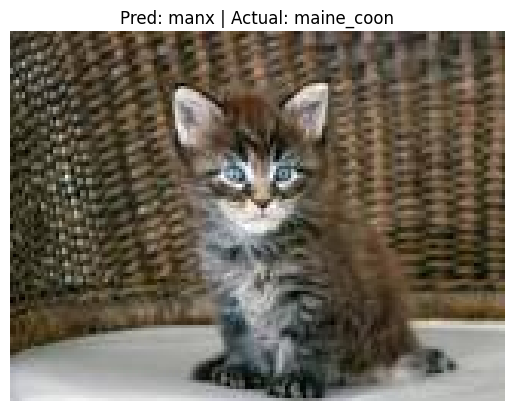

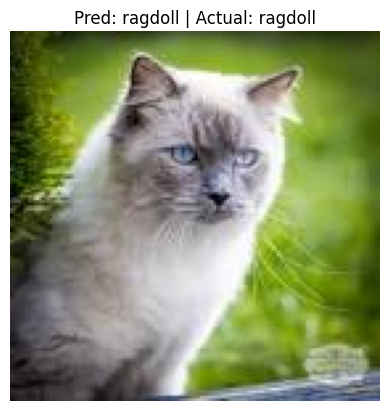

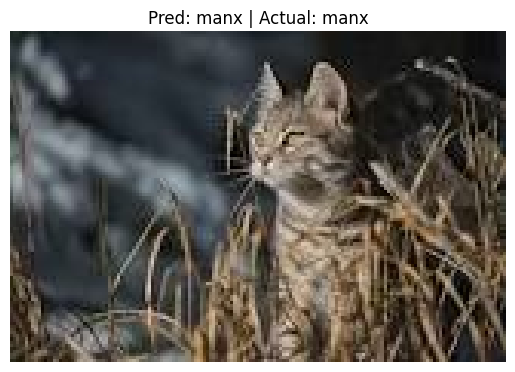

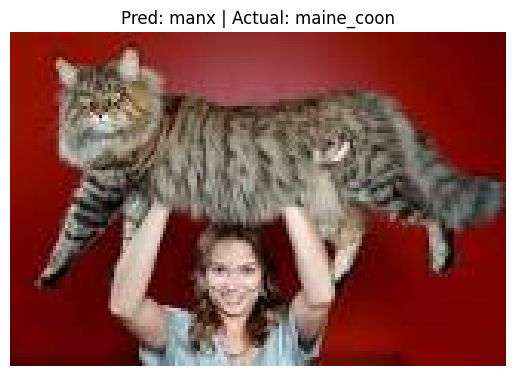

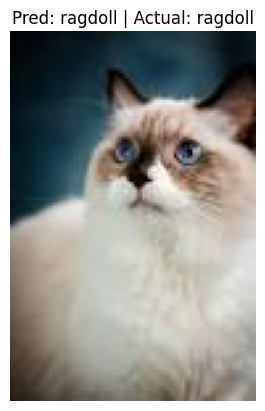

In [35]:
pred_and_plot_images(model_1,
                     list(test_path_mini.glob("*/*.png")) + list(test_path_mini.glob("*/*.jpg")),
                     class_names_mini,
                     simple_transform,
                     n=5)

In [62]:
class Model1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels= input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.conv_block_3 = nn.Sequential(
      nn.Conv2d(hidden_units, hidden_units, 3),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )


    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*5*5,
                  out_features=hidden_units),
        nn.BatchNorm1d(hidden_units),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.conv_block_3(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x



In [65]:
EPOCHS = 10

from timeit import default_timer as Timer

start = timer()

model_2 = Model1(input_shape = 3, hidden_units=128, output_shape = len(class_names_mini)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_2.parameters(), lr = 0.001)

model_2_results = train(model_2, train_mini_dataloader, test_mini_dataloader, loss_fn, optimizer, EPOCHS, device)

end = timer()

print(f"Total training time: {end-start:.3f} seconds") #60% with 20 secs

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0917 | train_acc: 43.9732 | test_loss: 1.0180 | test_acc: 56.8750
Epoch: 2 | train_loss: 1.0862 | train_acc: 43.3036 | test_loss: 1.2368 | test_acc: 53.9062
Epoch: 3 | train_loss: 1.0292 | train_acc: 50.2232 | test_loss: 1.0751 | test_acc: 46.7188
Epoch: 4 | train_loss: 0.9793 | train_acc: 53.5714 | test_loss: 1.1599 | test_acc: 29.6875
Epoch: 5 | train_loss: 0.9627 | train_acc: 54.9107 | test_loss: 1.6241 | test_acc: 30.4688
Epoch: 6 | train_loss: 1.0255 | train_acc: 49.1071 | test_loss: 1.0584 | test_acc: 53.7500
Epoch: 7 | train_loss: 0.9888 | train_acc: 56.2500 | test_loss: 0.9478 | test_acc: 61.4062
Epoch: 8 | train_loss: 1.0056 | train_acc: 50.2232 | test_loss: 0.8707 | test_acc: 64.6875
Epoch: 9 | train_loss: 0.9853 | train_acc: 54.6875 | test_loss: 0.9781 | test_acc: 60.0000
Epoch: 10 | train_loss: 0.9423 | train_acc: 55.5804 | test_loss: 0.8884 | test_acc: 61.2500
Total training time: 8.783 seconds


In [ ]:
13*13*10*2

In [67]:
train_augmented_transform_higher_res = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.TrivialAugmentWide(31),
    transforms.ToTensor()
])

test_data_mini = datasets.ImageFolder(test_path_mini, transform = simple_transform)
train_data_mini = datasets.ImageFolder(train_path_mini, transform = train_augmented_transform_higher_res)

train_mini_dataloader = DataLoader(train_data_mini, BATCH_SIZE, shuffle=True, num_workers=NUM_WORKES)
test_mini_dataloader = DataLoader(test_data_mini, BATCH_SIZE, shuffle=False, num_workers=NUM_WORKES)


In [86]:
class Model2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels= input_shape,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels= hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.conv_block_3 = nn.Sequential(
      nn.Conv2d(hidden_units, hidden_units, 3),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )


    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*5*5,
                  out_features=hidden_units),
        nn.BatchNorm1d(hidden_units),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )

    self.global_pool = nn.AdaptiveAvgPool2d((5, 5))


  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.conv_block_3(x)
    #print(x.shape)
    x = self.global_pool(x)
    x = self.classifier(x)
    #print(x.shape)
    return x



In [87]:
EPOCHS = 10

from timeit import default_timer as Timer

start = timer()

model_3 = Model2(input_shape = 3, hidden_units=128, output_shape = len(class_names_mini)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_3.parameters(), lr = 0.001)

model_3_results = train(model_3, train_mini_dataloader, test_mini_dataloader, loss_fn, optimizer, EPOCHS, device)

end = timer()

print(f"Total training time: {end-start:.3f} seconds") #60% with 20 secs

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0907 | train_acc: 45.5357 | test_loss: 1.3530 | test_acc: 32.5000
Epoch: 2 | train_loss: 1.0365 | train_acc: 51.7857 | test_loss: 1.0729 | test_acc: 56.0938
Epoch: 3 | train_loss: 0.9899 | train_acc: 50.0000 | test_loss: 1.1379 | test_acc: 45.1562
Epoch: 4 | train_loss: 0.9981 | train_acc: 53.7946 | test_loss: 1.4221 | test_acc: 28.9062
Epoch: 5 | train_loss: 0.9838 | train_acc: 52.2321 | test_loss: 1.6548 | test_acc: 31.2500
Epoch: 6 | train_loss: 0.9817 | train_acc: 51.7857 | test_loss: 1.2108 | test_acc: 54.5312
Epoch: 7 | train_loss: 1.0209 | train_acc: 52.6786 | test_loss: 1.2062 | test_acc: 37.8125
Epoch: 8 | train_loss: 0.9150 | train_acc: 56.6964 | test_loss: 1.7301 | test_acc: 31.2500
Epoch: 9 | train_loss: 0.9242 | train_acc: 57.8125 | test_loss: 1.3495 | test_acc: 45.3125
Epoch: 10 | train_loss: 0.9201 | train_acc: 58.9286 | test_loss: 1.0266 | test_acc: 54.8438
Total training time: 20.579 seconds


In [97]:
import torchvision.models as models

model_resnet = models.resnet34(weights="DEFAULT")

for param in model_resnet.parameters():
  param.requires_grad = False

num_features = model_resnet.fc.in_features

model_resnet.fc = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, len(class_names_mini))
)

model_resnet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.fc.parameters(), lr=0.001)  # Only train the FC layers

EPOCHS = 15

from timeit import default_timer as timer
start = timer()

resnet_results = train(model_resnet, train_mini_dataloader, test_mini_dataloader, loss_fn, optimizer, EPOCHS, device)

end = timer()
print(f"Total training time: {end-start:.2f} seconds")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 100MB/s]


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0479 | train_acc: 44.4196 | test_loss: 0.8180 | test_acc: 67.6562
Epoch: 2 | train_loss: 0.9012 | train_acc: 60.9375 | test_loss: 0.8424 | test_acc: 69.5312
Epoch: 3 | train_loss: 0.7435 | train_acc: 69.6429 | test_loss: 0.7915 | test_acc: 70.7812
Epoch: 4 | train_loss: 0.6507 | train_acc: 75.0000 | test_loss: 0.8052 | test_acc: 74.6875
Epoch: 5 | train_loss: 0.5964 | train_acc: 74.5536 | test_loss: 0.8206 | test_acc: 75.6250
Epoch: 6 | train_loss: 0.5871 | train_acc: 76.5625 | test_loss: 0.8367 | test_acc: 71.4062
Epoch: 7 | train_loss: 0.5522 | train_acc: 78.7946 | test_loss: 0.9325 | test_acc: 76.5625
Epoch: 8 | train_loss: 0.5208 | train_acc: 76.3393 | test_loss: 0.8910 | test_acc: 69.8438
Epoch: 9 | train_loss: 0.7107 | train_acc: 72.7679 | test_loss: 0.8393 | test_acc: 74.5312
Epoch: 10 | train_loss: 0.6132 | train_acc: 74.3304 | test_loss: 0.8910 | test_acc: 75.0000
Epoch: 11 | train_loss: 0.6153 | train_acc: 77.0089 | test_loss: 0.8027 | test_acc: 74.68

In [ ]:
for param in model_resnet.parameters():
    param.requires_grad = True



loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=1e-5)

EPOCHS = 15

from timeit import default_timer as timer
start = timer()

resnet_results = train(model_resnet, train_mini_dataloader, test_mini_dataloader, loss_fn, optimizer, EPOCHS, device)

end = timer()
print(f"Total training time: {end-start:.2f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4488 | train_acc: 83.4821 | test_loss: 0.9438 | test_acc: 72.9688
Epoch: 2 | train_loss: 0.4994 | train_acc: 77.4554 | test_loss: 0.9185 | test_acc: 76.2500
Epoch: 3 | train_loss: 0.4444 | train_acc: 78.1250 | test_loss: 0.9244 | test_acc: 76.2500
Epoch: 4 | train_loss: 0.3964 | train_acc: 82.8125 | test_loss: 0.9341 | test_acc: 78.5938
Epoch: 5 | train_loss: 0.3521 | train_acc: 88.6161 | test_loss: 0.9775 | test_acc: 77.0312
Epoch: 6 | train_loss: 0.3787 | train_acc: 83.2589 | test_loss: 0.9688 | test_acc: 73.5938
Epoch: 7 | train_loss: 0.3926 | train_acc: 84.8214 | test_loss: 0.9244 | test_acc: 77.8125
Epoch: 8 | train_loss: 0.3949 | train_acc: 85.4911 | test_loss: 0.9895 | test_acc: 74.5312
Epoch: 9 | train_loss: 0.3068 | train_acc: 89.0625 | test_loss: 0.9651 | test_acc: 76.8750
Epoch: 10 | train_loss: 0.2871 | train_acc: 87.0536 | test_loss: 0.9588 | test_acc: 79.3750
Epoch: 11 | train_loss: 0.3378 | train_acc: 85.9375 | test_loss: 0.9987 | test_acc: 77.81

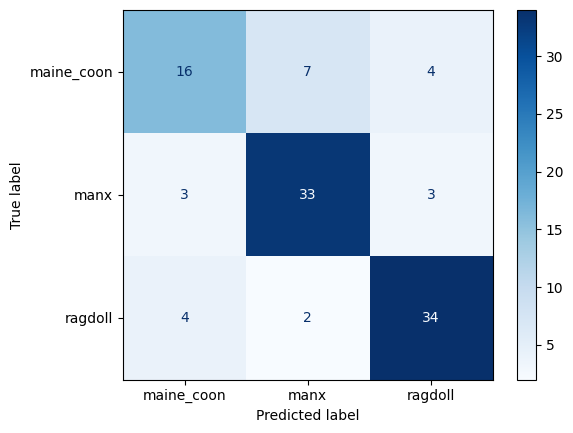

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []

model_resnet.eval()
with torch.inference_mode():
    for X, y in test_mini_dataloader:
        X = X.to(device)
        y_true.extend(y.cpu().numpy())
        preds = model_resnet(X).argmax(dim=1).cpu().numpy()
        y_pred.extend(preds)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_mini)
disp.plot(cmap='Blues')
plt.show()


In [106]:
import requests

custom_ragdoll_path = data_path / "custom_ragdoll.png"

with open(custom_ragdoll_path, "wb") as f:
  request = requests.get("https://scontent-vie1-1.xx.fbcdn.net/v/t1.15752-9/489525824_1803699200198133_4443585151369335625_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=0024fc&_nc_ohc=kkSCc5bXYk4Q7kNvwGHJd3l&_nc_oc=AdlWFw3YT0v_amBPEGueb9O1F08Yxl5xVJ9hwSWLVhfTUsyiuFeWi_flUhQZpY80WSl23CIDqwR2DwmlXGgTfprl&_nc_ad=z-m&_nc_cid=0&_nc_zt=23&_nc_ht=scontent-vie1-1.xx&oh=03_Q7cD2QHAZXIV2yNYnmcKzWeq5VsQsbjz4iLdPP69THUEFVysEw&oe=684D8BD2")
  print(request.status_code)
  f.write(request.content)

custom_main_coon_path = data_path / "custom_main_coon.png"

with open(custom_main_coon_path, "wb") as f:
  request = requests.get("https://scontent-vie1-1.xx.fbcdn.net/v/t1.15752-9/472045416_1426978631610367_6400107556746416700_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=0024fc&_nc_ohc=1Z2s6OjQ7_4Q7kNvwFCwnde&_nc_oc=AdlZ5HdGUVI98L1J34wTsS-5OqD5Mi6XV18beeu_j5HpZIPS0FFn4Se7Ei5Z6y5LKVNRW5IqhOJgtj5Fr43lJj9g&_nc_ad=z-m&_nc_cid=0&_nc_zt=23&_nc_ht=scontent-vie1-1.xx&oh=03_Q7cD2QFJrpCGcRYCkBYEJbQN66TnxtNfwwgLFnixWwRENv_eFA&oe=684D83FA")
  print(request.status_code)
  f.write(request.content)



200
200


In [108]:
import torchvision

# Load in custom image and convert the tensor values to float32
custom_ragdoll_image = torchvision.io.read_image(str(custom_ragdoll_path)).type(torch.float32)
# Divide the image pixel values by 255 to get them between [0, 1]
custom_ragdoll_image = custom_ragdoll_image / 255.
# Print out image data
print(f"Custom ragdoll image tensor:\n{custom_ragdoll_image}\n")
print(f"Custom ragdoll image shape: {custom_ragdoll_image.shape}\n")
print(f"Custom ragdoll image dtype: {custom_ragdoll_image.dtype}")

# Load in custom image and convert the tensor values to float32
custom_main_coon_image = torchvision.io.read_image(str(custom_main_coon_path)).type(torch.float32)
# Divide the image pixel values by 255 to get them between [0, 1]
custom_main_coon_image = custom_main_coon_image / 255.
# Print out image data
print(f"Custom main coon image tensor:\n{custom_main_coon_image}\n")
print(f"Custom main coon image shape: {custom_main_coon_image.shape}\n")
print(f"Custom main coon image dtype: {custom_main_coon_image.dtype}")

Custom ragdoll image tensor:
tensor([[[0.1059, 0.1059, 0.1020,  ..., 0.3137, 0.3137, 0.3137],
         [0.1059, 0.1059, 0.1020,  ..., 0.3098, 0.3137, 0.3137],
         [0.1020, 0.1020, 0.0980,  ..., 0.3059, 0.3059, 0.3059],
         ...,
         [0.2118, 0.2118, 0.2078,  ..., 0.1608, 0.1686, 0.1725],
         [0.2196, 0.2196, 0.2157,  ..., 0.1647, 0.1686, 0.1725],
         [0.2235, 0.2235, 0.2196,  ..., 0.1647, 0.1686, 0.1725]],

        [[0.1216, 0.1216, 0.1176,  ..., 0.3451, 0.3451, 0.3451],
         [0.1216, 0.1216, 0.1176,  ..., 0.3412, 0.3451, 0.3451],
         [0.1176, 0.1176, 0.1137,  ..., 0.3373, 0.3373, 0.3373],
         ...,
         [0.2196, 0.2196, 0.2157,  ..., 0.1647, 0.1725, 0.1765],
         [0.2275, 0.2275, 0.2235,  ..., 0.1686, 0.1725, 0.1765],
         [0.2314, 0.2314, 0.2275,  ..., 0.1686, 0.1725, 0.1765]],

        [[0.1333, 0.1333, 0.1294,  ..., 0.3882, 0.3882, 0.3882],
         [0.1333, 0.1333, 0.1294,  ..., 0.3843, 0.3882, 0.3882],
         [0.1294, 0.1294, 0.1

(np.float64(-0.5), np.float64(933.5), np.float64(1999.5), np.float64(-0.5))

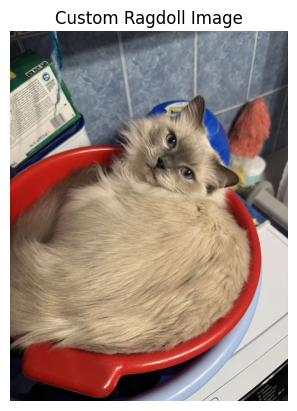

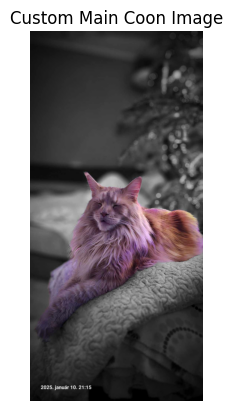

In [109]:

plt.figure()
plt.imshow(custom_ragdoll_image.permute(1, 2, 0))
plt.title("Custom Ragdoll Image")
plt.axis(False)

plt.figure()
plt.imshow(custom_main_coon_image.permute(1, 2, 0))
plt.title("Custom Main Coon Image")
plt.axis(False)


In [110]:

# Create transform and add batch dimension
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(128, 128))
])

custom_ragdoll_image_transformed = custom_image_transform(custom_ragdoll_image).unsqueeze(0).to(device)
custom_main_coon_image_transformed = custom_image_transform(custom_main_coon_image).unsqueeze(0).to(device)

print(f"Original ragdoll image shape: {custom_ragdoll_image.shape}")
print(f"Transformed ragdoll image shape: {custom_ragdoll_image_transformed.shape}")

print(f"Original main coon image shape: {custom_main_coon_image.shape}")
print(f"Transformed main coon image shape: {custom_main_coon_image_transformed.shape}")

Original ragdoll image shape: torch.Size([3, 2048, 1536])
Transformed ragdoll image shape: torch.Size([1, 3, 128, 128])
Original main coon image shape: torch.Size([3, 2000, 934])
Transformed main coon image shape: torch.Size([1, 3, 128, 128])


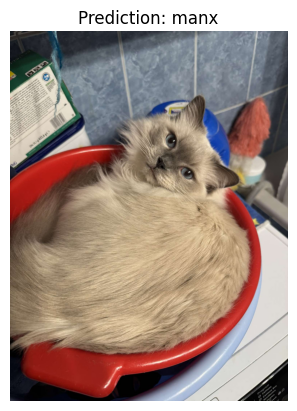

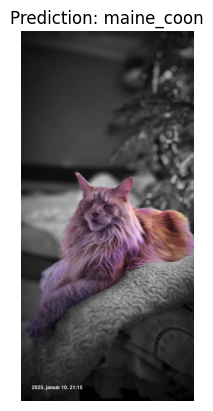

In [112]:

def predict_and_display(image_path, model, transform, class_names, device):
  """
  Predicts the class of a single image and displays it with the prediction.

  Args:
    image_path (str or Path): Path to the image.
    model (torch.nn.Module): The trained model.
    transform (torchvision.transforms.Compose): The transform to apply to the image.
    class_names (list): A list of class names.
    device (torch.device): The device to run the model on.
  """
  with Image.open(image_path) as img:
    # Apply the transformation and add a batch dimension
    transformed_image = transform(img).unsqueeze(0).to(device)

    # Make the prediction
    model.eval()
    with torch.no_grad():
      pred_logit = model(transformed_image)
      pred_prob = torch.softmax(pred_logit, dim=1)
      pred_label = torch.argmax(pred_prob, dim=1)
      pred_class = class_names[pred_label.cpu().item()]

    # Display the image and prediction
    plt.figure()
    plt.imshow(np.asarray(img))
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

# Define the transform to use for prediction (should be the same as the test transform)
predict_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)), # Assuming your model was trained on 128x128 images
    transforms.ToTensor()
])

# Predict on the custom ragdoll image
predict_and_display(custom_ragdoll_path, model_resnet, predict_transform, class_names_mini, device)

# Predict on the custom main coon image
predict_and_display(custom_main_coon_path, model_resnet, predict_transform, class_names_mini, device)